# Heart Attack Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Data Ingestion

In [2]:
df = pd.read_csv("heart.csv")  #importing data set;

## 2.Exploaratory Data Analysis (EDA)

In [3]:
df.shape  #Checking the shape of dataset

(1025, 14)

In [4]:
df.columns #Checking the columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### Details about the features:

age (Age in years)


sex : (1 = male, 0 = female)


cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina]


trestbps (Resting Blood Pressure in mm/hg )


chol (Serum Cholesterol in mg/dl)


fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]


restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal,
                        2: having ST-T wave abnormality]


thalach (maximum heart rate achieved)


exang (Exercise Induced Angina): [1 = yes, 0 = no]


oldpeak (ST depression induced by exercise relative to rest)


slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]


ca [number of major vessels (0–3)


thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]


target: [0 = disease, 1 = no disease]

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
#Here we Observed that there is no columns of object type in it and one feature (oldpeak) is only of type
#float rest all are of type int

In [11]:
#Checking the unique values in each column:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Here the column ca should range from [0,3] according to our problem but in describe function the ca's max value is showing
as 4 BUT in real the value 4 doesn't exist
OR
also in unique values count the ca has 5 counts but it must be 4 i.e--> 0,1,2,3 only
Therefore we have to remove the values of ca having 4.

In [12]:
#Count no. of values in each category of specif column:
df.ca.value_counts()

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

Hence there are 18 values in ca having the value 4 , so find that rows and set the value of ca to NaN on them

In [13]:
df[df['ca']==4]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [14]:
df.loc[df['ca']==4, 'ca'] = np.NaN

In [15]:
df['ca'].unique()

array([ 2.,  0.,  1.,  3., nan])

In [16]:
df['ca'].dtype


dtype('float64')

Here the dtype of ca is changed to float , hence convert it into int again

In [17]:
#df['ca'] = df['ca'].astype('int64')

Similarly:
    thal should range from 1 to 3 only but here 0 is also included, so replace it by NaN also

In [18]:
df['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [19]:
df.thal.value_counts()

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

In [20]:
df.loc[df['thal']==0, 'thal'] = np.NaN

In [21]:
df['thal'].unique()

array([ 3.,  2.,  1., nan])

In [22]:
#df['thal'] = df['thal'].astype('int64')

#### Checking for Missing values

In [23]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64

<Axes: >

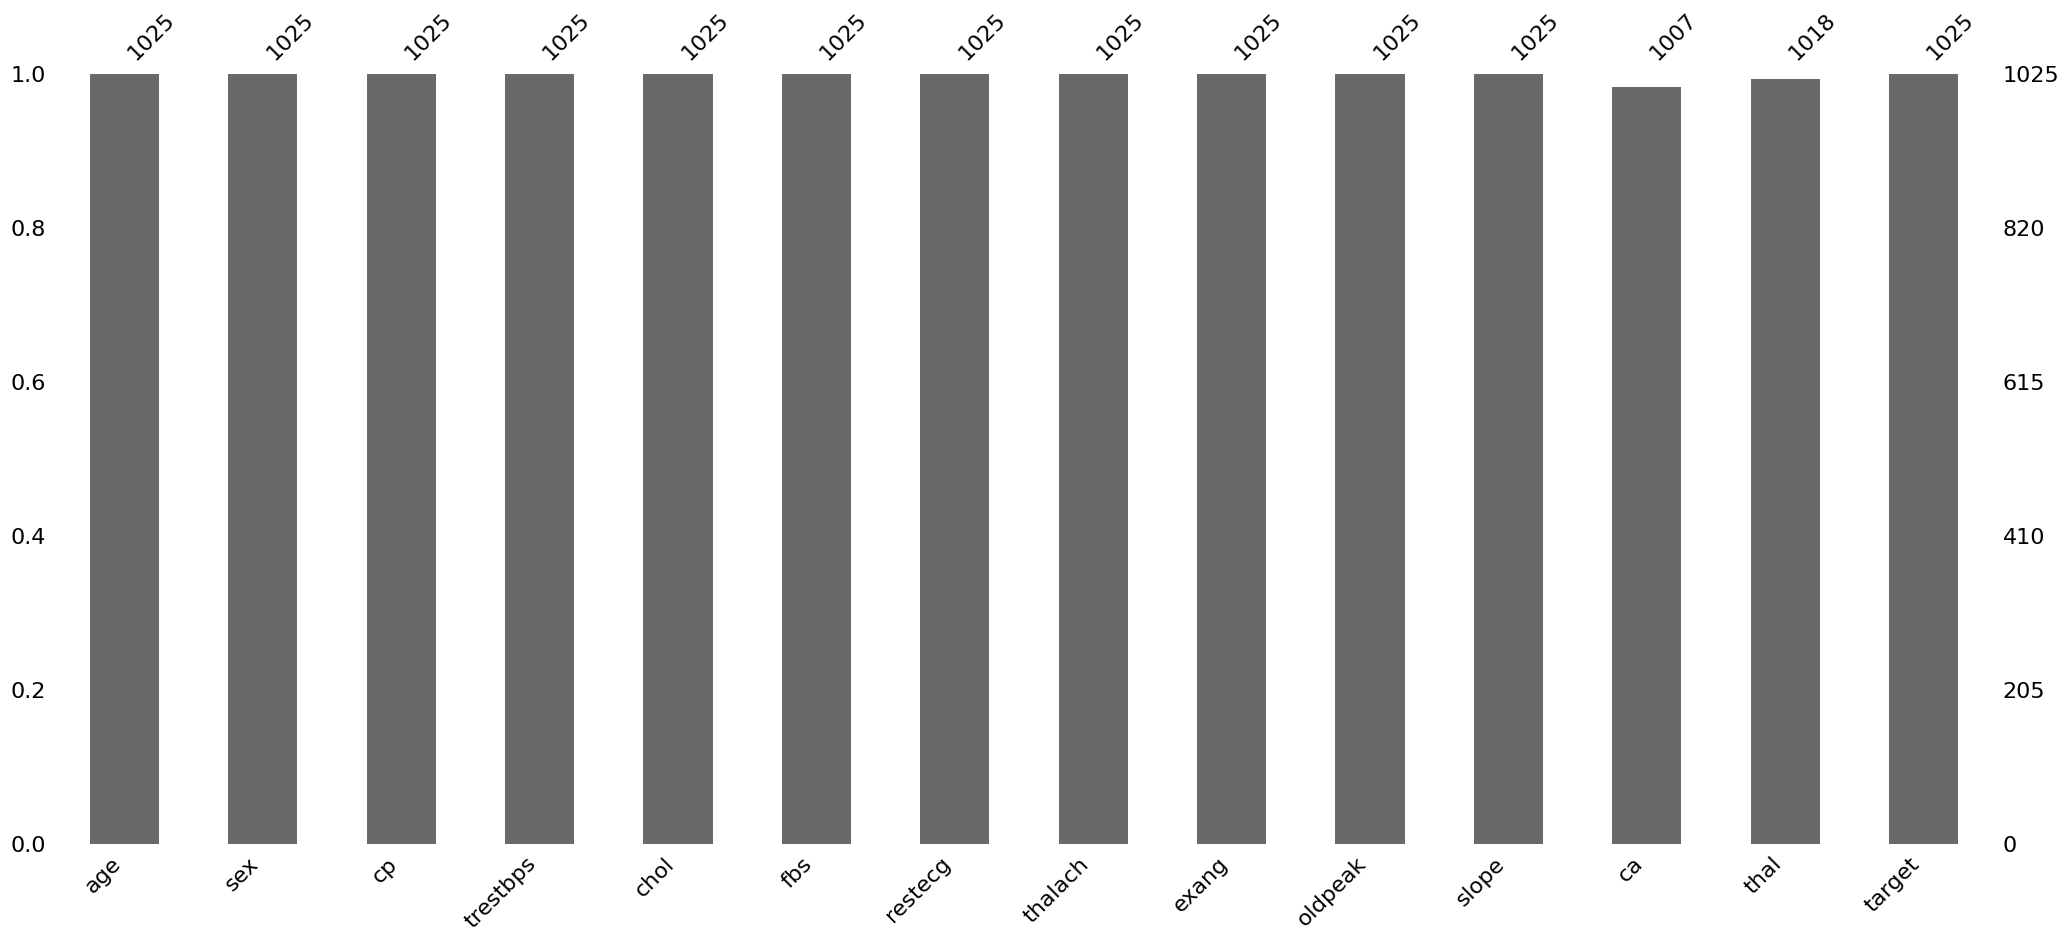

In [24]:
#Visualing the missing values
import missingno as msno
msno.bar(df)

In [25]:
#Replacing the Missing values with their median:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Checking for Duplicate Rows

In [26]:
df[df.duplicated()].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0.0,2.0,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0.0,2.0,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0.0,3.0,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0.0,3.0,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1.0,2.0,1


In [27]:
x = df.duplicated().sum()
print("Number of Duplicate rows in our DataSet is: ", x)

Number of Duplicate rows in our DataSet is:  723


In [28]:
#Removing duplicates:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Visualizing Outliers

age            Axes(0.125,0.712609;0.168478x0.167391)
sex         Axes(0.327174,0.712609;0.168478x0.167391)
cp          Axes(0.529348,0.712609;0.168478x0.167391)
trestbps    Axes(0.731522,0.712609;0.168478x0.167391)
chol           Axes(0.125,0.511739;0.168478x0.167391)
fbs         Axes(0.327174,0.511739;0.168478x0.167391)
restecg     Axes(0.529348,0.511739;0.168478x0.167391)
thalach     Axes(0.731522,0.511739;0.168478x0.167391)
exang           Axes(0.125,0.31087;0.168478x0.167391)
oldpeak      Axes(0.327174,0.31087;0.168478x0.167391)
slope        Axes(0.529348,0.31087;0.168478x0.167391)
ca           Axes(0.731522,0.31087;0.168478x0.167391)
thal               Axes(0.125,0.11;0.168478x0.167391)
target          Axes(0.327174,0.11;0.168478x0.167391)
dtype: object

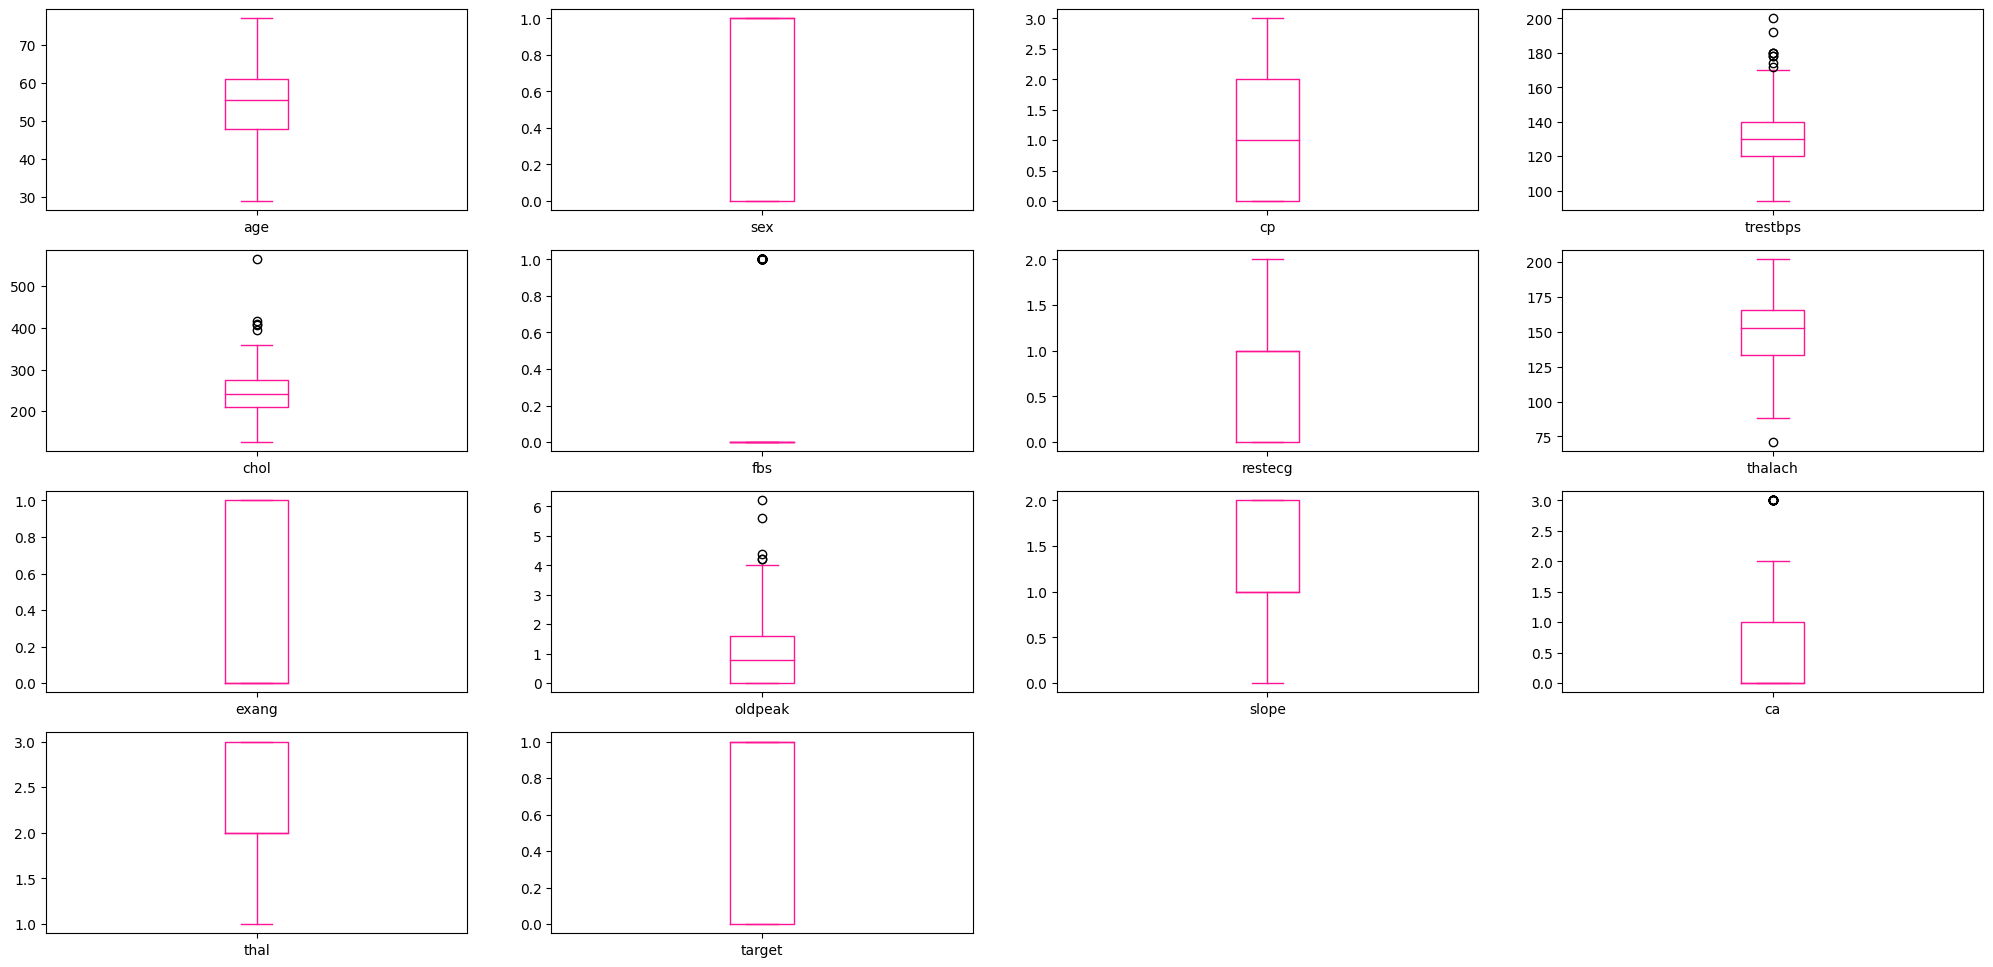

In [38]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(25,12),
        sharex =False, sharey=False, color="deeppink")

# plt.figure(figsize=(25,12))
# sns.boxplot(data=df)

#### Gender distribution according to target variable

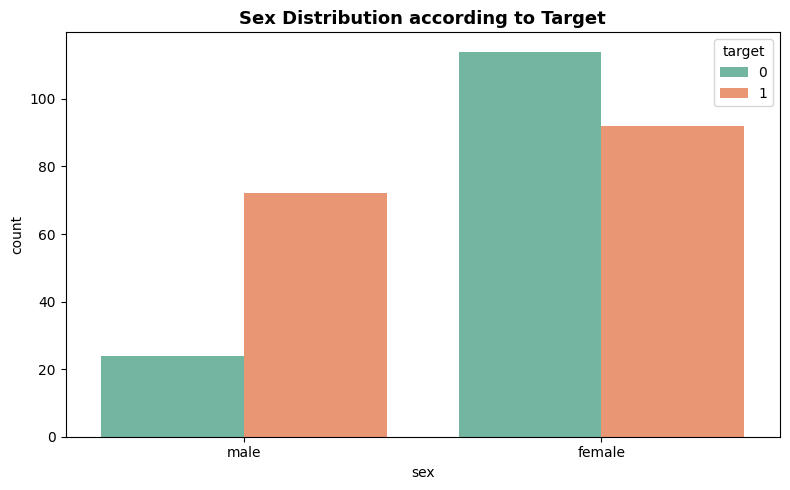

In [45]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='sex', hue='target', data=df, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
name = ['male', 'female']
ax.set_xticklabels (name)

totals = []
plt.tight_layout()

In [46]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.367313,0.063768,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.082978,0.213193,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.226091,-0.167628,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.101516,0.061360,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.126755,0.085620,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.139938,-0.011995,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.113629,-0.012146,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.264855,-0.113667,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.144385,0.224510,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.299605,0.208957,-0.429146


#### Checking for correlation

<Axes: >

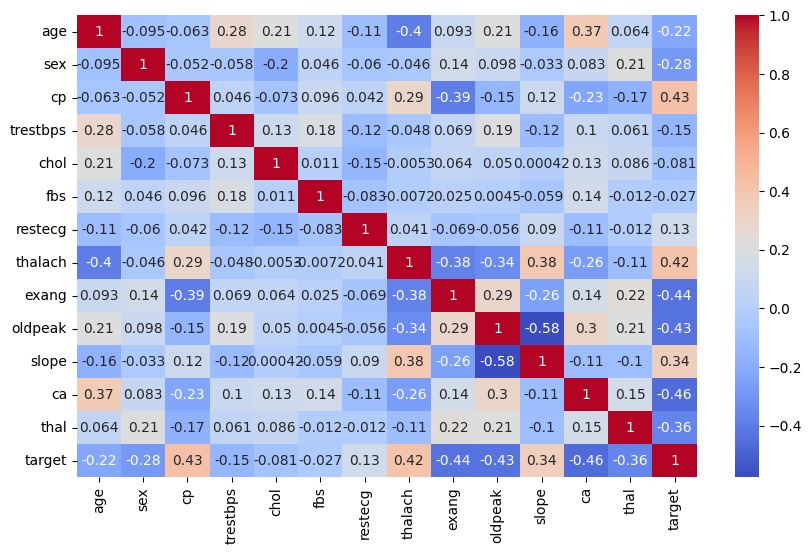

In [47]:
plt.figure(figsize=(10,6))
corr_features = df.corr().index
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='cp', ylabel='count'>

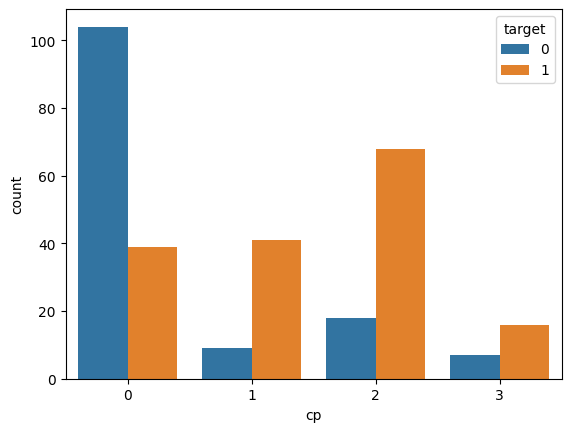

In [77]:
sns.countplot(x='cp', hue='target', data=df)

In [48]:
#Scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[cols_scale] = sc.fit_transform(df[cols_scale])
# df[cols_scale] = sc.fit(df[cols_scale])
# df[cols_scale] = sc.transform(df[cols_scale])

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2.0,3.0,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0.0,3.0,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0.0,3.0,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1.0,3.0,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3.0,2.0,0


In [50]:
y=df.iloc[:,-1].values
x=df.iloc[:,:-1].values
y=y.reshape(y.shape[0], -1)
print("Shape of x is: ", x.shape)
print("Shape of y is: ", y.shape)


Shape of x is:  (302, 13)
Shape of y is:  (302, 1)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.2)


In [52]:
#importing Classification model:
#Training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [53]:
#Checking the predictions of model:
y_pred = lr.predict(X_test)


In [54]:
#Finding the accuracy of model:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy of model is: ", round(acc*100, 2), "%")

Accuracy of model is:  83.61 %


#### Prediction for Custom values:

In [79]:
x_cust = [[59,1,0,12,2,0,1,10,0,1,2,2,30]]
print("Prediction is: ", lr.predict(x_cust))

Prediction is:  [0]
